### 1_Science_Technology_(PCA)

### Import

In [1209]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pyclustertend import hopkins
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.style.use('classic')
sns.set_style("white")

### Data Scraping Oecd

In [1210]:
# import pandas as pd
# import pandasdmx as sdmx
# import pandas_datareader.data as web

# pd.set_option('display.max_rows', None)#print everything rows
# pd.set_option('display.max_columns', None)#print everything columns

# series = 'STIO_2016'
# source = 'oecd'
# start = '2006-01-01'
# end = '2016-01-01'

# oecd = sdmx.Request('OECD')
# params = dict(startPeriod=start, endPeriod=end)
# data_msg = oecd.data('STIO_2016', key='all', params=params)
# data = data_msg.data[0]
# df = sdmx.to_pandas(data).unstack() #turn data into a dataframe
# print(df)

In [1211]:
#df.to_csv("science_technology.csv")

### Data Info

In [1212]:
df = pd.read_csv("science_technology.csv")
df.head()

,COUNTRY,INDICATOR,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ARG,ADTERPOP_XT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ARG,BE_AF_NC,9.80,9.90,11.80,12.10,16.50,23.39,27.41,32.94,NaN,NaN
2,ARG,BE_AF_PPP,7.29,6.42,6.44,6.05,7.11,8.78,8.87,9.15,NaN,NaN
3,ARG,BE_AF_PPPK,7.76,6.66,6.55,6.11,7.11,8.55,8.45,8.48,NaN,NaN
4,ARG,BE_AF_XGDP,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN


In [1213]:
df.shape

(17516, 12)

In [1214]:
df=pd.melt(df,
           id_vars=["COUNTRY","INDICATOR"],
           value_vars=["2006","2007","2008","2009","2010","2011","2012","2013","2014","2015"],
           var_name="TIME",
           value_name="VALUE")
df.head(2)

,COUNTRY,INDICATOR,TIME,VALUE
0,ARG,ADTERPOP_XT,2006,NaN
1,ARG,BE_AF_NC,2006,9.8


In [1215]:
df.shape

(175160, 4)

In [1216]:
df = df.pivot(index=["COUNTRY","TIME"], columns="INDICATOR", values=["VALUE"])
df.columns = df.columns.droplevel()
df = df.rename_axis(None, axis=1)
df = df.reset_index()
df.head(1)

,COUNTRY,TIME,ABS_I,ADTERPOP_XT,AFA_XBE,AGEPOP_MEDIAN,BE_AF_NC,BE_AF_PPP,BE_AF_PPPK,BE_AF_XGDP,...,WUGTARP_SCI_NB,WUGTARP_XT,WUGTA_ENG_NB,WUGTA_NB,WUGTA_SCI_NB,WUGTA_XT,WUNIVG_TERABARP_NB,WUNIVG_TERABARP_XT,XBR_I,YDEP_X1564
0,ARG,2006,NaN,NaN,NaN,NaN,9.8,7.29,7.76,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1217]:
df.shape

(510, 499)

In [1218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Columns: 499 entries, COUNTRY to YDEP_X1564
dtypes: float64(497), object(2)
memory usage: 1.9+ MB


In [1219]:
df.describe()

,ABS_I,ADTERPOP_XT,AFA_XBE,AGEPOP_MEDIAN,BE_AF_NC,BE_AF_PPP,BE_AF_PPPK,BE_AF_XGDP,BE_AR_NC,BE_AR_PPP,...,WUGTARP_SCI_NB,WUGTARP_XT,WUGTA_ENG_NB,WUGTA_NB,WUGTA_SCI_NB,WUGTA_XT,WUNIVG_TERABARP_NB,WUNIVG_TERABARP_XT,XBR_I,YDEP_X1564
count,80.000000,296.000000,148.000000,2.000000,283.000000,289.000000,283.000000,259.000000,2.050000e+02,218.000000,...,259.000000,135.000000,5.000000,11.000000,5.0000,6.000000,6.000000,6.000000,80.000000,457.000000
mean,2.119250,25.004831,33.942973,36.755000,8523.961943,1424.973737,1130.361025,0.121081,3.661786e+05,3776.514587,...,9230.308456,31.070148,1985.200000,139403.454545,3212.6000,59.808333,278841.166667,54.903333,0.534875,28.089453
std,0.787815,10.628215,16.499657,1.746554,23831.856300,3026.114870,2280.036939,0.246690,1.316399e+06,6301.574545,...,16424.962694,7.764802,1362.329329,94301.779364,3435.2389,1.048283,28301.040217,2.957713,0.688796,8.003298
min,0.840000,4.170000,2.540000,35.520000,4.520000,0.040000,0.050000,0.000000,7.980000e+00,14.420000,...,0.000000,15.460000,920.000000,21236.000000,1229.0000,58.460000,237823.000000,49.150000,0.010000,19.050000
25%,1.530000,17.282500,24.157500,36.137500,160.830000,77.050000,71.980000,0.020000,4.448000e+02,338.040000,...,1424.000000,25.775000,1301.000000,28285.000000,1589.0000,59.055000,258825.250000,54.977500,0.117500,21.850000
50%,2.085000,24.945000,31.610000,36.755000,1223.900000,362.600000,349.370000,0.060000,3.302370e+03,767.645000,...,2606.000000,31.430000,1451.000000,194194.000000,1600.0000,59.770000,286694.500000,55.690000,0.200000,25.730000
75%,2.465000,32.365000,41.760000,37.372500,3952.550000,1388.330000,1341.680000,0.130000,8.786380e+03,3995.427500,...,13327.500000,36.110000,1917.000000,212890.500000,2329.0000,60.755000,302463.250000,56.725000,0.505000,30.560000
max,4.750000,61.930000,72.370000,37.990000,282719.000000,19347.000000,18314.240000,1.790000,8.479291e+06,34021.440000,...,108537.000000,52.780000,4337.000000,242980.000000,9316.0000,60.950000,304580.000000,57.080000,2.900000,50.260000


In [1220]:
df.duplicated().any()

False

In [1221]:
df.isna().any()

COUNTRY               False
TIME                  False
ABS_I                  True
ADTERPOP_XT            True
AFA_XBE                True
                      ...  
WUGTA_XT               True
WUNIVG_TERABARP_NB     True
WUNIVG_TERABARP_XT     True
XBR_I                  True
YDEP_X1564             True
Length: 499, dtype: bool

In [1222]:
# Find the over %?-NAN-Value-Features and Drop them >>> (I get %70)
drop_list = []
remain_list = []

for i in df.columns[2:]:
    a = list(df[i].isna().value_counts())[0]
    b = len(df[i])
    c = (a / b) * 100
    if c > 70:
        drop_list.append(i)
    else:
        remain_list.append(i)

In [1223]:
print(len(drop_list))
print(len(remain_list))

173
324


In [1224]:
df.shape

(510, 499)

In [1225]:
df.drop(drop_list, axis=1, inplace=True)
df.shape

(510, 326)

In [1226]:
print(df.COUNTRY.nunique())
print(df.COUNTRY.unique())
# Totally 35 Countries

51
['ARG' 'AUS' 'AUT' 'BEL' 'BRA' 'CAN' 'CHE' 'CHL' 'CHN' 'COL' 'CRI' 'CZE'
 'DEU' 'DNK' 'EGY' 'ESP' 'EST' 'EU28' 'FIN' 'FRA' 'GBR' 'GRC' 'HUN' 'IDN'
 'IND' 'IRL' 'ISL' 'ISR' 'ITA' 'JPN' 'KOR' 'LTU' 'LUX' 'LVA' 'MEX' 'MYS'
 'NLD' 'NOR' 'NZL' 'OECD' 'PER' 'POL' 'PRT' 'RUS' 'SVK' 'SVN' 'SWE' 'THA'
 'TUR' 'USA' 'ZAF']


In [1227]:
print(df.TIME.nunique())
print(df.TIME.unique())
# Totally 10 Years

10
['2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015']


In [1228]:
country = pd.read_csv("iso_countries.csv")
country.head(2)

,ISO,ThreeDigitCountryCodeOE
0,AFG,AFG
1,ALB,ALB


In [1229]:
cnt_list = list(country.ISO.unique())
df_cnt = list(df.COUNTRY.unique())

In [1230]:
drp_cnt_lst = []
rmn_cnt_lst = []

for i in df_cnt:
    if i in cnt_list:
        rmn_cnt_lst.append(i)
    else:
        drp_cnt_lst.append(i)

print(drp_cnt_lst)

['EU28', 'OECD']


In [1231]:
df.shape

(510, 326)

In [1232]:
df.tail(2)

,COUNTRY,TIME,ADTERPOP_XT,BE_AF_NC,BE_AF_PPP,BE_AF_PPPK,BE_AF_XGDP,BE_AR_NC,BE_AR_PPP,BE_AR_XGDP,...,UNI500_HAB,WBBAND_HAB,WBBAND_NB,WPHD_ENG_NB,WPHD_NB,WPHD_SCI_NB,WRSE_XRSE,WUGTARP_ENG_NB,WUGTARP_NB,WUGTARP_SCI_NB
508,ZAF,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,ZAF,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1233]:
for i in drp_cnt_lst:
    df.drop(df[df["COUNTRY"]==i].index, inplace=True)
df.shape

(490, 326)

In [1234]:
df.tail(2)

,COUNTRY,TIME,ADTERPOP_XT,BE_AF_NC,BE_AF_PPP,BE_AF_PPPK,BE_AF_XGDP,BE_AR_NC,BE_AR_PPP,BE_AR_XGDP,...,UNI500_HAB,WBBAND_HAB,WBBAND_NB,WPHD_ENG_NB,WPHD_NB,WPHD_SCI_NB,WRSE_XRSE,WUGTARP_ENG_NB,WUGTARP_NB,WUGTARP_SCI_NB
508,ZAF,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,ZAF,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1235]:
df = df.reset_index(drop=True)
df.tail(2)

,COUNTRY,TIME,ADTERPOP_XT,BE_AF_NC,BE_AF_PPP,BE_AF_PPPK,BE_AF_XGDP,BE_AR_NC,BE_AR_PPP,BE_AR_XGDP,...,UNI500_HAB,WBBAND_HAB,WBBAND_NB,WPHD_ENG_NB,WPHD_NB,WPHD_SCI_NB,WRSE_XRSE,WUGTARP_ENG_NB,WUGTARP_NB,WUGTARP_SCI_NB
488,ZAF,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489,ZAF,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1236]:
df.isna().any().sum()

324

In [1237]:
df = df.fillna(0)
df.shape

(490, 326)

In [1238]:
df.isna().any().sum()

0

### Skewness

In [1239]:
df.head(1)

,COUNTRY,TIME,ADTERPOP_XT,BE_AF_NC,BE_AF_PPP,BE_AF_PPPK,BE_AF_XGDP,BE_AR_NC,BE_AR_PPP,BE_AR_XGDP,...,UNI500_HAB,WBBAND_HAB,WBBAND_NB,WPHD_ENG_NB,WPHD_NB,WPHD_SCI_NB,WRSE_XRSE,WUGTARP_ENG_NB,WUGTARP_NB,WUGTARP_SCI_NB
0,ARG,2006,0.0,9.8,7.29,7.76,0.0,329.8,245.2,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,50.45,0.0,0.0,0.0


In [1240]:
from scipy.stats import skew

Normal = []
Moderate = []
Skewed = []

x = df.drop(columns=["COUNTRY", "TIME"]).columns
for i in x:
    y = skew(df[i], nan_policy="omit")
    if y >= -0.5 and y < 0.5:
        Normal.append(i)
        print(f"{i} \t: {y} \t>>> Normal")
    elif y >= 0.5 and y < 1.0:
        Moderate.append(i)
        print(f"{i} \t: {y} \t>>> Moderate")
    elif y >= 1.0:
        Skewed.append(i)
        print(f"{i} \t: {y} \t>>> Skewed")

print("-"*100)
print(f"Normal \t\t:{len(Normal)}")
print(f"Moderate \t:{len(Moderate)}")
print(f"Skewed \t\t:{len(Skewed)}")     

ADTERPOP_XT 	: 0.4420122060930814 	>>> Normal
BE_AF_NC 	: 8.65681371262468 	>>> Skewed
BE_AF_PPP 	: 6.187100335467118 	>>> Skewed
BE_AF_PPPK 	: 6.0658499616853625 	>>> Skewed
BE_AF_XGDP 	: 7.043336519035073 	>>> Skewed
BE_AR_NC 	: 6.807030276653341 	>>> Skewed
BE_AR_PPP 	: 3.999953977827496 	>>> Skewed
BE_AR_XGDP 	: 2.1837133863269176 	>>> Skewed
BE_BEF_NC 	: 6.856624117805785 	>>> Skewed
BE_BEF_PPP 	: 4.527218153095782 	>>> Skewed
BE_BEF_PPPK 	: 4.488169732634527 	>>> Skewed
BE_BEF_XBE 	: -0.18866521485544968 	>>> Normal
BE_BEF_XG 	: 0.175081132950095 	>>> Normal
BE_BEF_XGDP 	: 1.521110733954084 	>>> Skewed
BE_DGVF_NC 	: 7.65748848055015 	>>> Skewed
BE_DGVF_PPP 	: 6.00699100246161 	>>> Skewed
BE_DGVF_PPPK 	: 6.0095150292852955 	>>> Skewed
BE_DGVF_XBE 	: 4.138873675518815 	>>> Skewed
BE_DGVF_XG 	: 4.474533093029735 	>>> Skewed
BE_DGVF_XGDP 	: 2.657873315463451 	>>> Skewed
BE_ED_NC 	: 6.785474521365984 	>>> Skewed
BE_ED_PPP 	: 6.586411577262644 	>>> Skewed
BE_ED_XGDP 	: 2.59607564865540

In [1241]:
Normal = []
Right = []
Left = []

x = df.drop(columns=["COUNTRY", "TIME"]).columns
for i in x:
    a = df[i].mean()
    b = df[i].median()
    if a == b:
        Normal.append(i)
        print(f"{i} \t: Normal Skewed")
    elif a > b:
        Right.append(i)
        print(f"{i} \t: Right Skewed")
    elif a < b:
        Left.append(i)
        print(f"{i} \t: Left Skewed")

print("-"*100)
print(f"Normal \t:{len(Normal)}")
print(f"Right \t:{len(Right)}")
print(f"Left \t:{len(Left)}")     

ADTERPOP_XT 	: Right Skewed
BE_AF_NC 	: Right Skewed
BE_AF_PPP 	: Right Skewed
BE_AF_PPPK 	: Right Skewed
BE_AF_XGDP 	: Right Skewed
BE_AR_NC 	: Right Skewed
BE_AR_PPP 	: Right Skewed
BE_AR_XGDP 	: Right Skewed
BE_BEF_NC 	: Right Skewed
BE_BEF_PPP 	: Right Skewed
BE_BEF_PPPK 	: Right Skewed
BE_BEF_XBE 	: Left Skewed
BE_BEF_XG 	: Left Skewed
BE_BEF_XGDP 	: Right Skewed
BE_DGVF_NC 	: Right Skewed
BE_DGVF_PPP 	: Right Skewed
BE_DGVF_PPPK 	: Right Skewed
BE_DGVF_XBE 	: Right Skewed
BE_DGVF_XG 	: Right Skewed
BE_DGVF_XGDP 	: Right Skewed
BE_ED_NC 	: Right Skewed
BE_ED_PPP 	: Right Skewed
BE_ED_XGDP 	: Right Skewed
BE_GRO 	: Right Skewed
BE_HEF_NC 	: Right Skewed
BE_HEF_PPP 	: Right Skewed
BE_HEF_PPPK 	: Right Skewed
BE_LGE_XBE 	: Right Skewed
BE_ONF_NC 	: Right Skewed
BE_ONF_PPP 	: Right Skewed
BE_ONF_PPPK 	: Right Skewed
BE_PNPF_NC 	: Right Skewed
BE_PNPF_PPP 	: Right Skewed
BE_PNPF_PPPK 	: Right Skewed
BE_PNPF_XGDP 	: Right Skewed
BE_SME_XBE 	: Right Skewed
BE_XBE 	: Right Skewed
EGOV_I 	

### Train Test Split

In [1242]:
X = df.drop(["COUNTRY", "TIME"], axis=1)
X.head(1)

,ADTERPOP_XT,BE_AF_NC,BE_AF_PPP,BE_AF_PPPK,BE_AF_XGDP,BE_AR_NC,BE_AR_PPP,BE_AR_XGDP,BE_BEF_NC,BE_BEF_PPP,...,UNI500_HAB,WBBAND_HAB,WBBAND_NB,WPHD_ENG_NB,WPHD_NB,WPHD_SCI_NB,WRSE_XRSE,WUGTARP_ENG_NB,WUGTARP_NB,WUGTARP_SCI_NB
0,0.0,9.8,7.29,7.76,0.0,329.8,245.2,0.04,930.3,691.67,...,0.0,0.0,0.0,0.0,0.0,0.0,50.45,0.0,0.0,0.0


### Scaling

In [1243]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
df_X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_X_scaled.head()

,ADTERPOP_XT,BE_AF_NC,BE_AF_PPP,BE_AF_PPPK,BE_AF_XGDP,BE_AR_NC,BE_AR_PPP,BE_AR_XGDP,BE_BEF_NC,BE_BEF_PPP,...,UNI500_HAB,WBBAND_HAB,WBBAND_NB,WPHD_ENG_NB,WPHD_NB,WPHD_SCI_NB,WRSE_XRSE,WUGTARP_ENG_NB,WUGTARP_NB,WUGTARP_SCI_NB
0,0.0,0.000035,0.000377,0.000424,0.0,0.000039,0.007207,0.032258,0.000020,0.002530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.952966,0.000000,0.00000,0.000000
1,0.0,0.000035,0.000332,0.000364,0.0,0.000049,0.008000,0.032258,0.000025,0.002809,...,0.0,0.0,0.0,0.0,0.0,0.0,0.972988,0.000000,0.00000,0.000000
2,0.0,0.000042,0.000333,0.000358,0.0,0.000059,0.007978,0.032258,0.000030,0.002804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.968266,0.000000,0.00000,0.000000
3,0.0,0.000043,0.000313,0.000334,0.0,0.000060,0.007477,0.032258,0.000031,0.002629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.980544,0.000000,0.00000,0.000000
4,0.0,0.000058,0.000367,0.000388,0.0,0.000082,0.008772,0.032258,0.000042,0.003084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.986400,0.041585,0.02317,0.026959


### PCA Model & Best Number of Component

In [1244]:
X.columns.value_counts().sum()

324

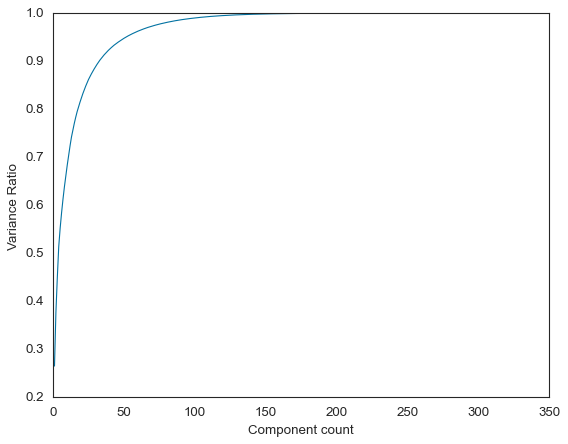

In [1245]:
from sklearn.decomposition import PCA

model = PCA().fit(X_scaled)
x = range(1,325)

plt.plot(x, np.cumsum(model.explained_variance_ratio_))
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");

In [1246]:
model = PCA(n_components=324).fit(X_scaled)

In [1247]:
my_dict = {"explained_variance":model.explained_variance_, 
           "explained_variance_ratio":model.explained_variance_ratio_,
           "cumsum_explained_variance_ratio":model.explained_variance_ratio_.cumsum()}

In [1248]:
df_best = pd.DataFrame(my_dict, index = range(1,325))
df_best = df_best.sort_values(by="explained_variance_ratio")
df_best = df_best.iloc[:50,:]
df_best.shape

(50, 3)

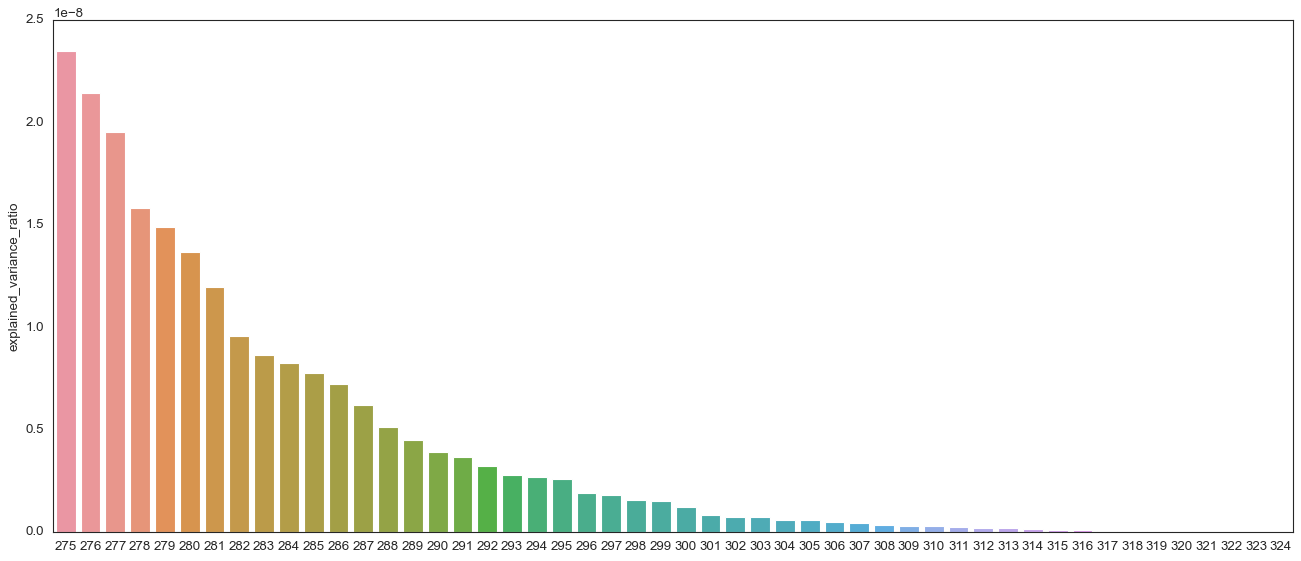

In [1249]:
plt.figure(figsize=(20,8))
sns.barplot(df_best.index, df_best.explained_variance_ratio);

In [1250]:
# Decide to create 7 components

### PCA Model & Component=7

In [1251]:
model = PCA(n_components=7)

In [1252]:
prncpl_comp = model.fit_transform(X_scaled)
prncpl_comp

array([[-0.35827537, -0.29994839, -0.55921627, ..., -0.66678724,
        -0.31756315,  0.54642189],
       [-0.32962913, -0.32025651, -0.55950721, ..., -0.6654899 ,
        -0.34868369,  0.56180322],
       [-0.25163274, -0.35116084, -0.53819281, ..., -0.68220566,
        -0.38161878,  0.5651874 ],
       ...,
       [-2.20926951,  0.63074556, -0.07042344, ..., -0.03271269,
         0.13874676, -0.0360931 ],
       [-2.14889668,  0.57795731, -0.09608321, ..., -0.07566338,
         0.24615675,  0.01040626],
       [-2.21239064,  0.63147146, -0.07910719, ..., -0.03174471,
         0.15841021, -0.03801462]])

In [1253]:
comp_df = pd.DataFrame(data = prncpl_comp,
                       columns = ["1_Comp","2_Comp","3_Comp","4_Comp","5_Comp","6_Comp","7_Comp"])
comp_df

,1_Comp,2_Comp,3_Comp,4_Comp,5_Comp,6_Comp,7_Comp
0,-0.358275,-0.299948,-0.559216,-0.712880,-0.666787,-0.317563,0.546422
1,-0.329629,-0.320257,-0.559507,-0.698999,-0.665490,-0.348684,0.561803
2,-0.251633,-0.351161,-0.538193,-0.653775,-0.682206,-0.381619,0.565187
3,-0.159450,-0.352338,-0.588657,-0.736724,-0.721948,-0.367339,0.572326
4,-0.501822,-0.215500,-0.407640,-0.512549,-0.861673,-0.041207,0.641713
...,...,...,...,...,...,...,...
485,-0.866859,0.163598,-0.852426,-1.012890,-0.008712,-0.162448,-0.031312
486,-0.820893,0.153007,-0.836833,-1.014010,-0.029514,-0.185612,0.005512
487,-2.209270,0.630746,-0.070423,0.064893,-0.032713,0.138747,-0.036093
488,-2.148897,0.577957,-0.096083,0.076814,-0.075663,0.246157,0.010406


### Eigenvalues & Eigenvectors

### Eigenvectors

In [1254]:
model.components_

array([[ 0.05131103,  0.01462241,  0.02553255, ...,  0.03153754,
         0.02235171,  0.03160753],
       [-0.04286254,  0.0248697 ,  0.03790317, ...,  0.05015299,
         0.05497928,  0.05667343],
       [ 0.08587445, -0.03198458,  0.04492164, ...,  0.01301084,
         0.01828074,  0.05077673],
       ...,
       [-0.00222206, -0.01330709,  0.00465048, ..., -0.01791422,
         0.01811908, -0.0196333 ],
       [ 0.03245518, -0.006654  ,  0.00823127, ..., -0.05864168,
        -0.0007075 , -0.02945891],
       [-0.10591608,  0.00294984, -0.02243144, ..., -0.02660728,
        -0.01742958, -0.05331527]])

In [1255]:
len(model.components_)

7

In [1256]:
# for i in range(0,7):
#     x = f"eigv_comp_{i+1}"
#     z = f"{i+1}_eigv"
#     x = pd.DataFrame(model.components_[i],
#                      index=X.columns,
#                      columns=[z]).sort_values(z, ascending=False)
#     print(f"eigv_comp_{i+1}_1st_row \t: {x.iloc[0,0]}")

In [1257]:
eigv_comp_1 = model.components_[0]
eigv_comp_1

array([ 0.05131103,  0.01462241,  0.02553255,  0.02659821,  0.01604286,
        0.0218697 ,  0.0408076 ,  0.06382711,  0.02160306,  0.04219513,
        0.0444067 ,  0.21086511,  0.17478064,  0.10669486,  0.0190086 ,
        0.02512889,  0.02483577,  0.02634837,  0.02741213,  0.05226609,
        0.02176172,  0.01436701,  0.06021972,  0.00824536,  0.0205448 ,
        0.02298046,  0.02325537,  0.14385196,  0.03056772,  0.00196643,
        0.0014393 ,  0.0193229 ,  0.0170104 ,  0.01678952,  0.00909692,
        0.0733555 ,  0.17338019,  0.0255394 ,  0.02401075,  0.02461647,
        0.16544341, -0.03332433, -0.03106606,  0.03002897,  0.13131352,
        0.01098791,  0.05487773,  0.12449505,  0.0955918 ,  0.04526316,
        0.03902694,  0.0206148 ,  0.05213101,  0.04630298,  0.03113784,
        0.03659664,  0.02200789,  0.02521804,  0.03511731,  0.16746884,
        0.13855707,  0.01838648,  0.02371322,  0.00497322,  0.04044833,
        0.03422823,  0.02121386,  0.03978895,  0.03724053,  0.03

In [1258]:
pd.DataFrame(eigv_comp_1,
             index=X.columns,
             columns=["1_eigv"]).sort_values("1_eigv", ascending=False)

,1_eigv
BE_BEF_XBE,0.210865
BE_BEF_XG,0.174781
BE_XBE,0.173380
GB_CIV_XGB,0.167469
EMPF1564_X1564F,0.165443
...,...
PNP_XG,0.001186
PNP_AF_XG,0.000496
G_HEF_XG,-0.004030
EMPV_XEMP,-0.031066


In [1259]:
df_X_scaled.loc[0]

ADTERPOP_XT       0.000000
BE_AF_NC          0.000035
BE_AF_PPP         0.000377
BE_AF_PPPK        0.000424
BE_AF_XGDP        0.000000
                    ...   
WPHD_SCI_NB       0.000000
WRSE_XRSE         0.952966
WUGTARP_ENG_NB    0.000000
WUGTARP_NB        0.000000
WUGTARP_SCI_NB    0.000000
Name: 0, Length: 324, dtype: float64

In [1260]:
(df_X_scaled.loc[0] * eigv_comp_1).sum()

1.876416257908343